## Employee Visas

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import sovai as sov
sov.token_auth(token="your_token_here")

#### Processed Dataset (Large File)

In [15]:
df_visa = sov.data("visas/h1b", start_date="2010-01-01", tickers=["MSFT","TSLA", "AAPL","META"], limit=1000000)

In [16]:
df_visa.tail()

predicted_pay case_status         case_number  \
ticker date                                                        
TSLA   2024-03-21     180000.000   certified  i-200-24081-819315   
       2024-03-21     180000.000   certified  i-200-24081-819315   
       2024-03-21     180000.000   certified  i-200-24081-819315   
       2024-03-21     180000.000   certified  i-200-24081-819315   
       2024-03-22     191000.000   certified  i-200-24082-825195   

                         decision_date visa_class           begin_date  \
ticker date                                                              
TSLA   2024-03-21  2024-03-28T00:00:00       h-1b  2024-04-01T00:00:00   
       2024-03-21  2024-03-28T00:00:00       h-1b  2024-04-01T00:00:00   
       2024-03-21  2024-03-28T00:00:00       h-1b  2024-04-01T00:00:00   
       2024-03-21  2024-03-28T00:00:00       h-1b  2024-04-01T00:00:00   
       2024-03-22  2024-03-29T00:00:00       h-1b  2024-08-01T00:00:00   

                              end_date employer_name employer_address1  \
ticker date                                                              
TSLA   2024-03-21  2027-03-31T00:00:00   tesla, inc.      1 tesla road   
       2024-03-21  2027-03-31T00:00:00   tesla, inc.      1 tesla road   
       2024-03-21  2027-03-31T00:00:00   tesla, inc.      1 tesla road   
       2024-03-21  2027-03-31T00:00:00   tesla, inc.      1 tesla road   
       2024-03-22  2027-07-31T00:00:00   tesla, inc.      1 tesla road   

                  employer_city employer_state employer_postal_code  \
ticker date                                                           
TSLA   2024-03-21        austin             tx                78725   
       2024-03-21        austin             tx                78725   
       2024-03-21        austin             tx                78725   
       2024-03-21        austin             tx                78725   
       2024-03-22        austin             tx                78725   

                     soc_code                               soc_title  \
ticker date                                                             
TSLA   2024-03-21  15-1252.00                     software developers   
       2024-03-21  15-1252.00                     software developers   
       2024-03-21  15-1252.00                     software developers   
       2024-03-21  15-1252.00                     software developers   
       2024-03-22  11-9041.00  architectural and engineering managers   

                                                 job_title  \
ticker date                                                  
TSLA   2024-03-21  sr. distributed systems engineer - eng.   
       2024-03-21  sr. distributed systems engineer - eng.   
       2024-03-21  sr. distributed systems engineer - eng.   
       2024-03-21  sr. distributed systems engineer - eng.   
       2024-03-22        manager manufacturing engineering   

                   wage_rate_of_pay_from  wage_rate_of_pay_to  \
ticker date                                                     
TSLA   2024-03-21             180000.000           180000.000   
       2024-03-21             180000.000           180000.000   
       2024-03-21             180000.000           180000.000   
       2024-03-21             180000.000           180000.000   
       2024-03-22             191000.000           191000.000   

                  wage_unit_of_pay full_time_position worksite_address2  \
ticker date                                                               
TSLA   2024-03-21             year                  y              None   
       2024-03-21             year                  y              None   
       2024-03-21             year                  y              None   
       2024-03-21             year                  y              None   
       2024-03-22             year                  y              None   

                  worksite_state  prevailing_wage pw_unit_of_pay  \
ticker da

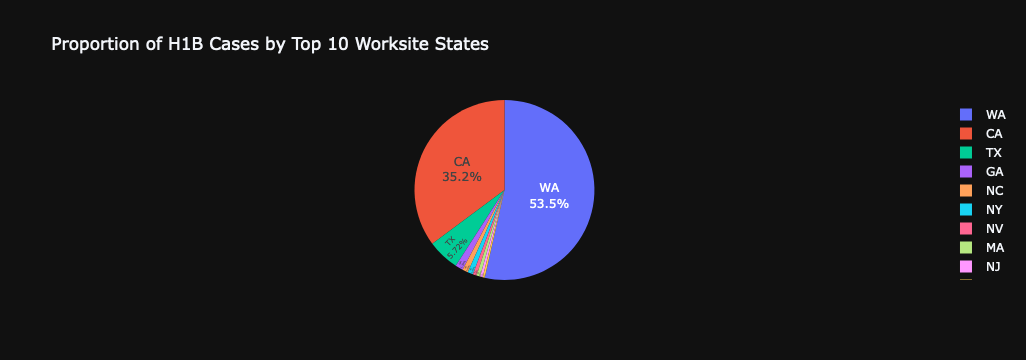

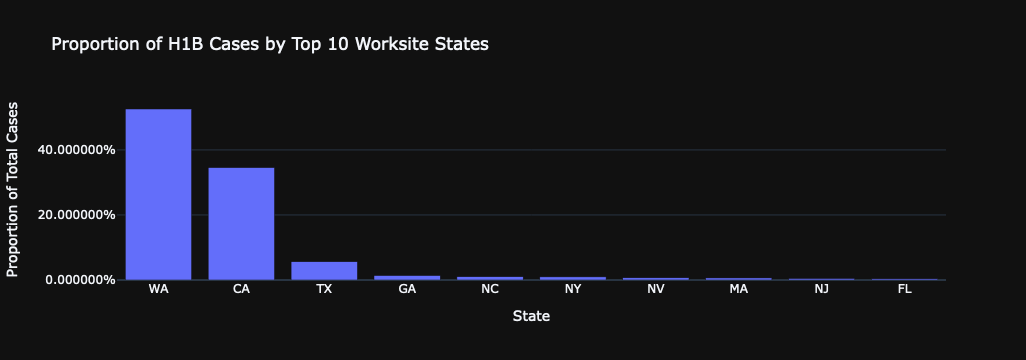

In [17]:
import plotly.express as px

df_visa_res = df_visa.reset_index()
top_states = df_visa_res.groupby("worksite_state")['ticker'].count().nlargest(10)

# Step 2: Calculate total cases and proportions
total_cases = df_visa_res['ticker'].count()
top_states_proportions = top_states / total_cases
top_states_proportions = top_states_proportions.reset_index()
top_states_proportions.columns = ['worksite_state', 'proportion']

# Step 3: Create a pie chart
fig = px.pie(top_states_proportions, values='proportion', names='worksite_state', title='Proportion of H1B Cases by Top 10 Worksite States')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Or create a bar chart
fig = px.bar(top_states_proportions, x='worksite_state', y='proportion',
             title='Proportion of H1B Cases by Top 10 Worksite States',
             labels={'proportion': 'Proportion of Total Cases', 'worksite_state': 'State'})
fig.update_layout(yaxis_tickformat='%', xaxis_title="State", yaxis_title="Proportion of Total Cases")
fig.show()

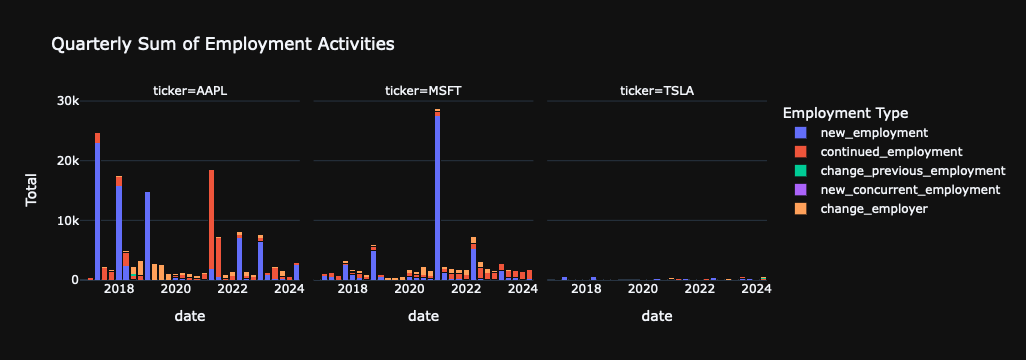

In [18]:
# Group by ticker and resample quarterly, summing up the specified columns
import pandas as pd

df_resampled = df_visa.groupby('ticker').resample('Q', level='date').agg({
    'new_employment': 'sum',
    'continued_employment': 'sum',
    'change_previous_employment': 'sum',
    'new_concurrent_employment': 'sum',
    'change_employer': 'sum'
}).reset_index()

df_resampled = df_resampled[df_resampled['date'] >= pd.Timestamp('2016-09-01')]


# Reshape the DataFrame from wide to long format for easier plotting with Plotly
df_long = df_resampled.melt(id_vars=['ticker', 'date'], var_name='Employment Type', value_name='Total')

# Create the stacked bar chart
fig = px.bar(df_long, 
             x='date', 
             y='Total', 
             color='Employment Type', 
             barmode='stack',
             facet_col='ticker',  # Use this if you want separate charts for each ticker
             title='Quarterly Sum of Employment Activities')

# Show the plot
fig.show()

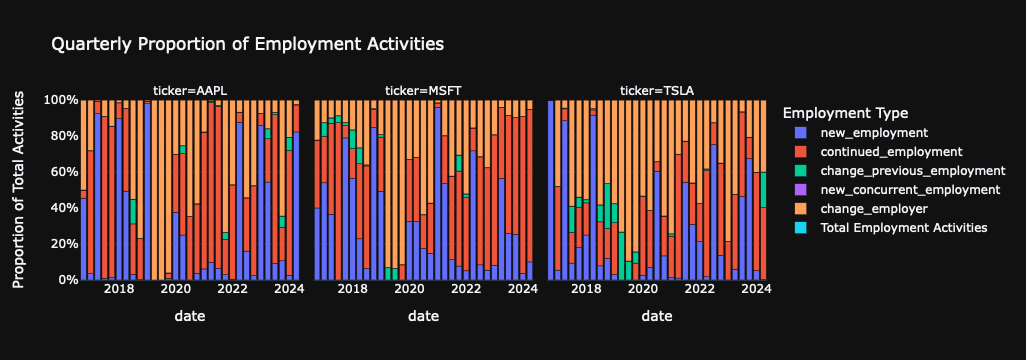

In [19]:
# Group by ticker and resample quarterly, summing up the specified columns
df_resampled = df_visa.groupby('ticker').resample('Q', level='date').agg({
    'new_employment': 'sum',
    'continued_employment': 'sum',
    'change_previous_employment': 'sum',
    'new_concurrent_employment': 'sum',
    'change_employer': 'sum'
}).reset_index()

# Calculate the total of all types of employment for each period to find proportions
df_resampled['Total Employment Activities'] = df_resampled[['new_employment', 'continued_employment', 'change_previous_employment', 'new_concurrent_employment', 'change_employer']].sum(axis=1)

# Calculate the proportion of each type of employment
for col in ['new_employment', 'continued_employment', 'change_previous_employment', 'new_concurrent_employment', 'change_employer']:
    df_resampled[col] = df_resampled[col] / df_resampled['Total Employment Activities']

# Filter data to start from September 2016
df_resampled = df_resampled[df_resampled['date'] >= pd.Timestamp('2016-09-01')]


# Reshape the DataFrame from wide to long format for easier plotting with Plotly
df_long = df_resampled.melt(id_vars=['ticker', 'date'], var_name='Employment Type', value_name='Proportion')

# Create the stacked bar chart
fig = px.bar(df_long, 
             x='date', 
             y='Proportion', 
             color='Employment Type', 
             barmode='relative',  # This ensures the bars are stacked showing the relative proportions
             facet_col='ticker',  # Use this if you want separate charts for each ticker
             title='Quarterly Proportion of Employment Activities',
             labels={'Proportion': 'Proportion of Total Activities'},
             category_orders={"Employment Type": ["new_employment", "continued_employment", "change_previous_employment", "new_concurrent_employment", "change_employer"]})  # Optional: Orders the stack sequence

# Adjust y-axis to show proportions from 0 to 1
fig.update_layout(yaxis=dict(tickformat='.0%', range=[0, 1]))

# Show the plot
fig.show()


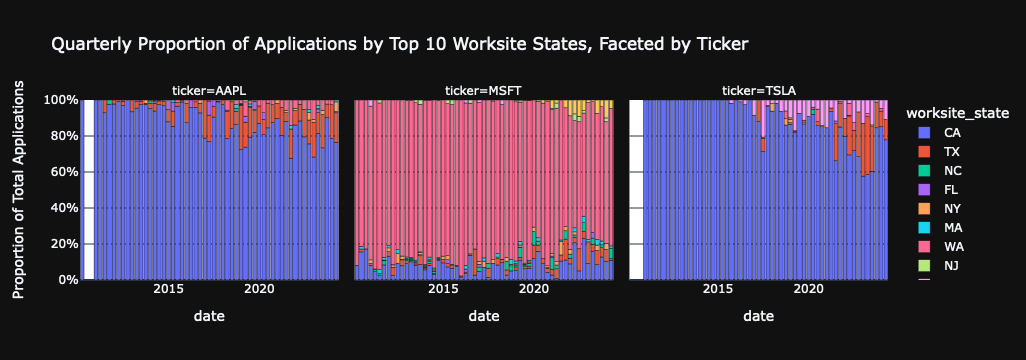

In [20]:
import pandas as pd
import plotly.express as px

# Assuming df_visa is your DataFrame and includes 'date', 'case_status', and 'worksite_state'
# Convert 'date' column to datetime if it's not already
# df_visa['date'] = pd.to_datetime(df_visa['date'])
# Identify the top 10 states based on total application volume
top_states = df_visa['worksite_state'].value_counts().nlargest(10).index

# Filter the DataFrame for only the top 10 states
df_visa_filtered = df_visa[df_visa['worksite_state'].isin(top_states)]

# Group by state and ticker, resample quarterly
df_resampled = df_visa_filtered.groupby(['ticker', 'worksite_state', pd.Grouper(level='date', freq='Q')]).size().reset_index(name='counts')

# Calculate the total applications per ticker and date
total_counts = df_resampled.groupby(['ticker', 'date'])['counts'].sum().reset_index(name='total_counts')

# Merge back to calculate proportions
df_resampled = df_resampled.merge(total_counts, on=['ticker', 'date'])
df_resampled['proportion'] = df_resampled['counts'] / df_resampled['total_counts']

# Reshape the DataFrame from wide to long format for easier plotting with Plotly
df_long = df_resampled.melt(id_vars=['worksite_state', 'date', 'ticker'], value_vars=['proportion'], var_name='Metric', value_name='Value')

# Create the stacked bar chart, using faceting by ticker
fig = px.bar(df_long, 
             x='date', 
             y='Value', 
             color='worksite_state',  # Colors represent different worksite states
             barmode='relative',  # This ensures the bars are stacked showing the relative proportions
             facet_col='ticker',  # Faceting by ticker
             title='Quarterly Proportion of Applications by Top 10 Worksite States, Faceted by Ticker',
             labels={'Value': 'Proportion of Total Applications'},
             category_orders={"Metric": ["proportion"]})  # Optional: Orders the stack sequence

# Adjust y-axis to show proportions from 0 to 1
fig.update_layout(yaxis=dict(tickformat='.0%', range=[0, 1]))

# Optional: Adjust layout if faceting
fig.update_layout(
    autosize=True,
    plot_bgcolor='white'
)

# Show the plot
fig.show()

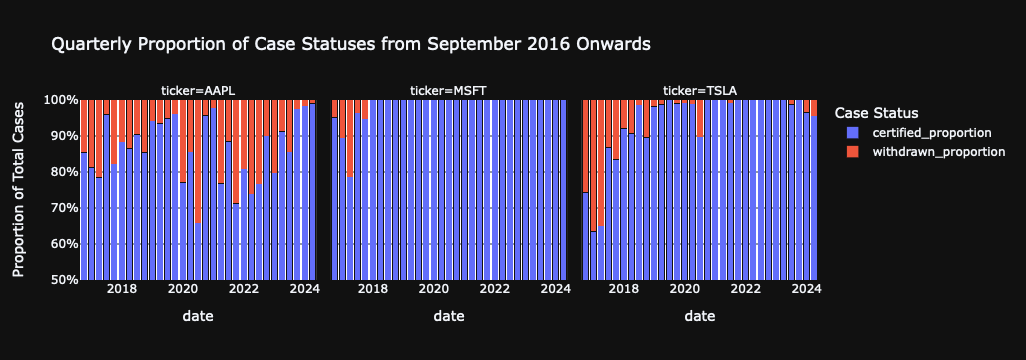

In [21]:
import pandas as pd
import plotly.express as px

# Assuming df_visa is your DataFrame and it includes 'date' and 'case_status' columns
# Convert 'date' column to datetime if it's not already
# df_visa['date'] = pd.to_datetime(df_visa['date'])

# Step 1: Adjust the case status
# Step 1: Adjust the case status
df_visa['case_status'] = df_visa['case_status'].apply(lambda x: 'withdrawn' if x != 'certified' else 'certified')

# Step 2: Group by ticker and resample quarterly, counting the status occurrences
df_resampled = df_visa.groupby(['ticker', pd.Grouper(level='date', freq='Q')])['case_status'].value_counts().unstack(fill_value=0).reset_index()

# Filter data to start from September 2016
df_resampled = df_resampled[df_resampled['date'] >= pd.Timestamp('2016-09-01')]

# Calculate the total of case statuses for each period
df_resampled['total_cases'] = df_resampled['certified'] + df_resampled['withdrawn']

# Calculate the proportion of each case status
df_resampled['certified_proportion'] = df_resampled['certified'] / df_resampled['total_cases']
df_resampled['withdrawn_proportion'] = df_resampled['withdrawn'] / df_resampled['total_cases']

# Reshape the DataFrame from wide to long format for easier plotting with Plotly
df_long = df_resampled.melt(id_vars=['ticker', 'date'], value_vars=['certified_proportion', 'withdrawn_proportion'], var_name='Case Status', value_name='Proportion')

# Create the stacked bar chart, using faceting by ticker if necessary
fig = px.bar(df_long, 
             x='date', 
             y='Proportion', 
             color='Case Status', 
             barmode='stack',  # This ensures the bars are stacked showing the relative proportions
             facet_col='ticker',  # Faceting by ticker
             title='Quarterly Proportion of Case Statuses from September 2016 Onwards',
             labels={'Proportion': 'Proportion of Total Cases'},
             category_orders={"Case Status": ["certified_proportion", "withdrawn_proportion"]})  # Optional: Orders the stack sequence

# Adjust y-axis to show proportions from 0 to 1
fig.update_layout(yaxis=dict(tickformat='.0%', range=[0.5, 1]))

# Optional: Adjust layout if faceting
fig.update_layout(
    autosize=True,
    # width=1000,
    # height=600,
    plot_bgcolor='white'
)

# Show the plot
fig.show()


In [23]:
df_resampled

,ticker,date,case_status
0,AAPL,2010-03-31,2
1,AAPL,2010-06-30,0
2,AAPL,2010-09-30,0
3,AAPL,2010-12-31,192
4,AAPL,2011-03-31,252
...,...,...,...
163,TSLA,2023-03-31,198
164,TSLA,2023-06-30,614
165,TSLA,2023-09-30,357
166,TSLA,2023-12-31,205


In [25]:
df_resampled

case_status  total_cases
ticker date                                
AAPL   2016-09-30          335          335
       2016-12-31          251          251
       2017-03-31          678          678
       2017-06-30          348          348
       2017-09-30          378          378
...                        ...          ...
TSLA   2023-03-31          198          198
       2023-06-30          614          614
       2023-09-30          357          357
       2023-12-31          205          205
       2024-03-31          547          547

[93 rows x 2 columns]

In [26]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.figure_factory as ff
import pandas as pd
import numpy as np

# Sample DataFrame setup
# Ensure your date column is in datetime format
# df_visa = pd.read_csv('your_data.csv')
# df_visa['date'] = pd.to_datetime(df_visa['date'])

df_visa_ri = df_visa.reset_index().copy()
df_visa_ri['date'] = pd.to_datetime(df_visa_ri['date'])  # converting date column to datetime
df_visa_ri = df_visa_ri[df_visa_ri["predicted_pay"] < df_visa["predicted_pay"].quantile(0.999)]

app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.Div(style={'color': 'white'}, children=[
        html.Label("Select Date Range:"),
        dcc.RangeSlider(
            id='date-range-slider',
            min=df_visa_ri['date'].min().timestamp() * 1000,
            max=df_visa_ri['date'].max().timestamp() * 1000,
            value=[df_visa_ri['date'].min().timestamp() * 1000, df_visa_ri['date'].max().timestamp() * 1000],
            marks={int(d.timestamp() * 1000): {'label': d.strftime('%Y-Q%q'), 'style': {'color': '#fff', 'transform': 'rotate(-45deg)', 'white-space': 'nowrap'}} for d in pd.date_range(start=df_visa_ri['date'].min(), end=df_visa_ri['date'].max(), freq='QS')},
            step=90 * 24 * 60 * 60 * 1000  # approx three months in milliseconds
        ),
    ]),
    html.Div(style={'color': 'white', 'margin-top': '20px'}, children=[
        html.Label("Select Sample Size:"),
        dcc.Slider(
            id='sample-size-slider',
            min=10,
            max=len(df_visa_ri),  # initially set to the length of the original filtered data
            value=min(10000, len(df_visa_ri)),  # default sample size or maximum available
            step=10
        ),
    ]),
    dcc.Graph(id='dist-plot'),
])

# Callback to update graph based on selected date range and sample size
@app.callback(
    [Output('dist-plot', 'figure'),
     Output('sample-size-slider', 'max')],
    [Input('date-range-slider', 'value'),
     Input('sample-size-slider', 'value')]
)
def update_figure(date_range, sample_size):
    start_date, end_date = pd.to_datetime(date_range[0], unit='ms'), pd.to_datetime(date_range[1], unit='ms')
    filtered_df = df_visa_ri[(df_visa_ri['date'] >= start_date) & (df_visa_ri['date'] <= end_date)]
    sample_size = min(sample_size, len(filtered_df))  # adjust sample size to not exceed the number of available records
    sampled_df = filtered_df.sample(n=sample_size, random_state=1) if len(filtered_df) > 0 else filtered_df

    hist_data = []
    group_labels = []
    for ticker in sampled_df["ticker"].unique():
        hist_data.append(sampled_df[sampled_df['ticker'] == ticker]['predicted_pay'].values)
        group_labels.append(ticker)

    fig = ff.create_distplot(hist_data, group_labels, bin_size=10000)
    fig.update_layout(
        title="Predicted Pay Distribution by Ticker",
        xaxis_title="Predicted Pay",
        yaxis_title="Density",
        legend_title="Ticker",
        annotations=[
            dict(
                x=0.9,
                y=1.1,
                xref="paper",
                yref="paper",
                text=f"Sample Size: {sample_size}",
                showarrow=False,
                font=dict(
                    size=14,
                    color="white"
                )
            )
        ]
    )

    # Return the figure and the new maximum for the sample size slider
    return fig, len(filtered_df)

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

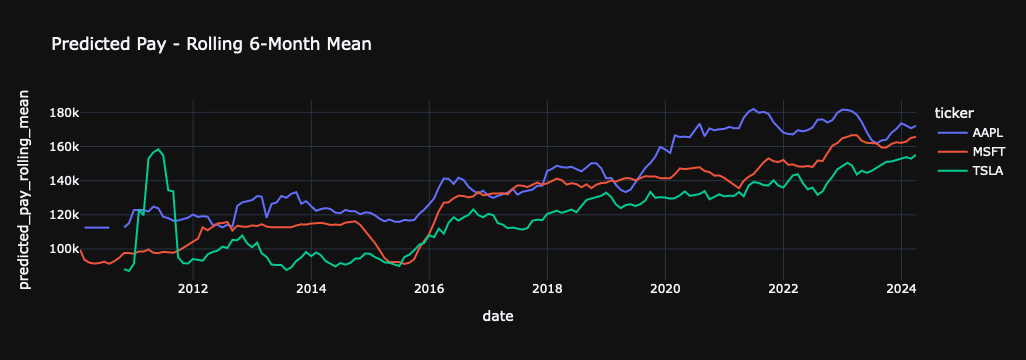

In [27]:
import pandas as pd
import plotly.express as px

# Filter for the 'AAPL' ticker
df_ticks = df_visa.groupby('ticker')['predicted_pay'].resample('M', level='date').mean(numeric_only=True)

# df_ticks_rolling = df_ticks.unstack().rolling(window=6, min_periods=1).mean(numeric_only=True).stack()

# Calculate the rolling 6-month mean
df_ticks_rolling = df_ticks.groupby(level=0).rolling(window=6, min_periods=1).mean()

df_ticks_rolling = df_ticks_rolling.droplevel(0)

df_ticks_rolling = df_ticks_rolling.reset_index()


df_ticks_rolling.columns = ['ticker', 'date', 'predicted_pay_rolling_mean']  # Assign the correct column name

# Create the time series plot with multiple lines
fig = px.line(df_ticks_rolling[["ticker", "date", "predicted_pay_rolling_mean"]], x='date', y='predicted_pay_rolling_mean', color='ticker', title='Predicted Pay - Rolling 6-Month Mean')

# Show the plot
fig.show()

In [28]:
import pandas as pd

# Assuming df_visa is already defined
# Calculate mean and count of predicted_pay for each group
grouped_data = df_visa.groupby(["soc_title", "ticker"]).agg(
    mean_predicted_pay=('predicted_pay', 'mean'),
    count=('predicted_pay', 'count')
)

# Sort by mean_predicted_pay and select the top 20
top_20 = grouped_data.sort_values(by='mean_predicted_pay', ascending=False).head(20)

print(top_20)


                                                  mean_predicted_pay  count
soc_title                                 ticker                           
chief executives                          TSLA            400000.000      1
general and operations managers           MSFT            256337.365     85
architectural and engineering managers    MSFT            238718.750     32
natural sciences managers                 AAPL            235000.000      7
advertising and promotions managers       MSFT            220820.000     16
public relations managers                 MSFT            218920.000     30
sales managers                            TSLA            217266.462     13
producers and directors                   AAPL            215000.000      1
information security engineers            TSLA            210000.000      4
meeting, convention, and event planners   AAPL            210000.000      8
financial managers                        AAPL            209540.177     62
marketing ma

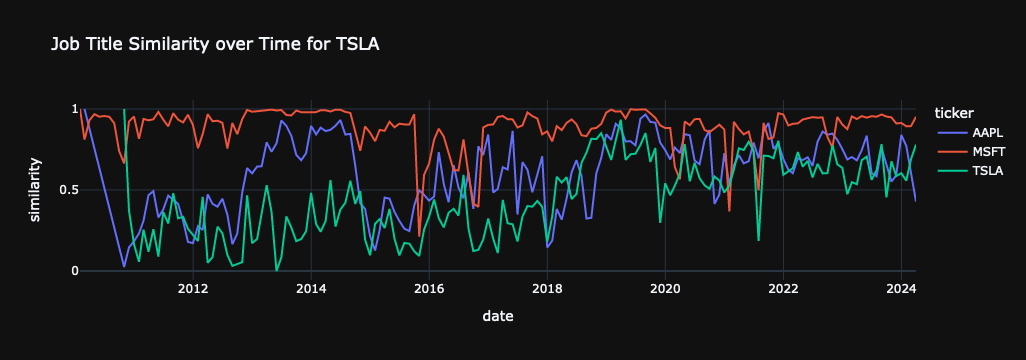

In [29]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px

def preprocess_job_titles(job_titles):
    """Preprocess job titles by converting to lowercase and removing special characters"""
    job_titles = job_titles.str.lower()  # Convert to lowercase
    job_titles = job_titles.str.replace('[^a-zA-Z\s]', '', regex=True)  # Remove special characters
    return job_titles

def calculate_job_title_similarity(df, ticker):
    """Calculate the cosine similarity between job title vectors for consecutive time periods"""
    df = df[df['ticker'] == ticker]  # Filter for the given ticker
    df['job_title'] = preprocess_job_titles(df['job_title'])  # Preprocess job titles

    # Create TF-IDF vectors for job titles
    vectorizer = TfidfVectorizer()
    job_title_vectors = vectorizer.fit_transform(df['job_title'])

    # Group job title vectors by date and calculate the average vector for each time period
    avg_vectors = []
    dates = []
    for date, group in df.groupby(pd.Grouper(key='date', freq='M')):
        job_titles = group['job_title']
        if len(job_titles) > 0:
            group_vectors = job_title_vectors[job_titles.index]
            avg_vector = np.mean(group_vectors.toarray(), axis=0)  # Convert to dense array
            avg_vectors.append(avg_vector)
            dates.append(date)

    # Calculate the cosine similarity between consecutive time periods
    similarities = [1.0]  # Start with a similarity of 1.0
    for i in range(1, len(avg_vectors)):
        prev_vector = avg_vectors[i - 1]
        curr_vector = avg_vectors[i]
        similarity = cosine_similarity([prev_vector], [curr_vector])[0][0]
        similarities.append(similarity)

    # Create a DataFrame with dates and similarities
    similarity_df = pd.DataFrame({'date': dates, 'similarity': similarities})

    return similarity_df

# Filter for a specific ticker
ticker = 'AAPL'
df_visa_ri = df_visa.reset_index()

df = []
for ticker in df_visa_ri["ticker"].unique():
    aapl_data = df_visa_ri[df_visa_ri['ticker'] == ticker].reset_index(drop=True)
    # Calculate the job title similarity over time
    similarity_df = calculate_job_title_similarity(aapl_data, ticker)
    similarity_df["ticker"] = ticker
    df.append(similarity_df)

similarity_df = pd.concat(df,axis=0)

# Create a line plot to visualize the job title similarity over time
fig = px.line(similarity_df, x='date', y='similarity', color="ticker", title=f'Job Title Similarity over Time for {ticker}')
fig.show()